requirements: 
1. matplotlib 3.4.3
2. python 3.9.12
3. pandas 1.4.2
4. sklearn 1.0.2
5. shap

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import shap

# RFC

In [3]:
from joblib import load
results_small = load('test/dfs&results/results_small.joblib')

In [2]:
df_small = pd.read_csv('test/dfs&results/df_all_small.tsv', sep='\t')
learning_df = pd.read_csv('test/dfs&results/learning_df.tsv', sep='\t')

In [4]:
X_learning = learning_df.drop(['virus', 'host','group', 'group_code', 'y'],axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

In [52]:
X_test = X_learning[learning_df['group_code'] == 0]
explainer = shap.Explainer(results_small['estimator'][0])
shap_values = explainer.shap_values(X_test)

In [53]:
shap_values[1].shape

(21, 9)

In [54]:
np.mean(shap_values[1], axis=0)

array([-7.20906016e-02, -1.85658013e-04, -2.75393239e-02, -5.73146578e-02,
       -6.98044568e-02, -3.87525474e-02, -5.65728590e-02, -9.46376673e-05,
       -5.84138974e-02])

In [47]:
def get_shap_values(estimators: list, X_learn: pd.DataFrame):
    vals = []
    for i, est in enumerate(estimators):
        X_test = X_learn[learning_df['group_code'] == i]
        explainer = shap.Explainer(est)
        vals.append(explainer.shap_values(X_test)[1])
    vals = np.array(vals)
    return vals

In [48]:
shap_vals = get_shap_values(results_small['estimator'], X_learning)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [49]:
shap_vals

array([array([[ 2.98456169e-01, -1.56442169e-04,  1.31199182e-03,
                2.56120395e-01, -9.98803735e-02, -2.59067134e-02,
                2.57615457e-03, -2.65981533e-04, -7.25476491e-02],
              [-1.24015560e-01, -9.17018900e-05, -6.78505311e-02,
               -6.71687541e-02, -7.50501698e-02, -7.64031364e-02,
               -7.13672489e-02, -6.50458954e-05, -1.82803006e-02],
              [-1.16454326e-01, -1.21573839e-04, -6.16081893e-02,
               -6.61771264e-02, -1.15101574e-01, -1.54207951e-02,
               -7.50244942e-02, -5.01434252e-05, -5.03342275e-02],
              [-1.30037826e-01, -1.00770862e-04, -4.91882865e-02,
               -6.98941987e-02, -1.24853347e-01, -2.00388432e-02,
               -6.19338768e-02, -5.24935463e-05, -3.91928061e-02],
              [-1.39359914e-01, -1.04653202e-04, -6.19619406e-02,
               -7.44825213e-02,  2.81379805e-03, -8.66457814e-02,
               -8.74781945e-02, -6.76088952e-05, -4.30056333e-02],
     

In [50]:
from joblib import dump
dump(shap_vals, 'test/shap_values_rfc.joblib')

['test/shap_values_rfc.joblib']

In [5]:
from joblib import load
shap_vals = load('test/shap_values_rfc.joblib')

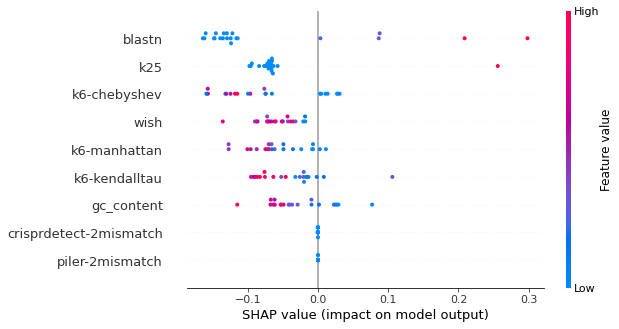

In [8]:
shap.summary_plot(shap_vals[0], X_learning[learning_df['group_code'] == 0])

In [37]:
def plot_shap_values(shap_values: list, X_learn: pd.DataFrame):
    for i, vals in enumerate(shap_values):
        shap.summary_plot(vals, X_learn[learning_df['group_code'] == i], show=False)
        plt.title(f'Group {i} ({learning_df[learning_df["group_code"] == i].iloc[0]["group"]}) SHAP values')
        plt.savefig(f'test/shap_plots/group_{i}.png')
        plt.show()
        plt.clf()
    return

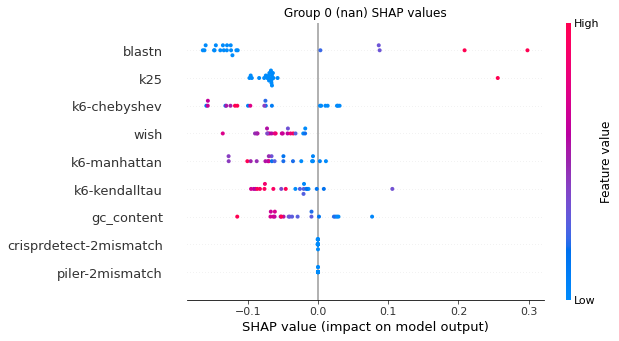

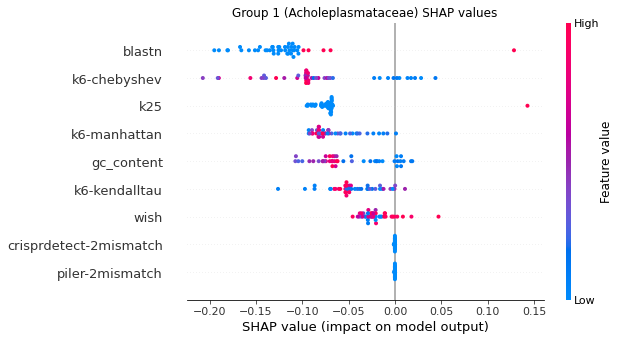

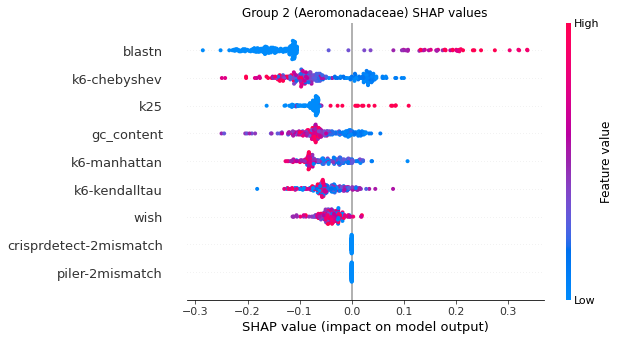

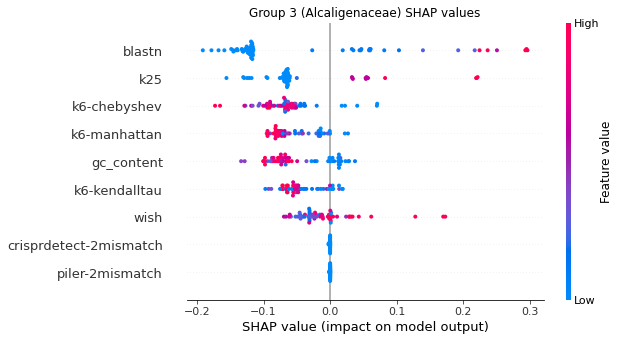

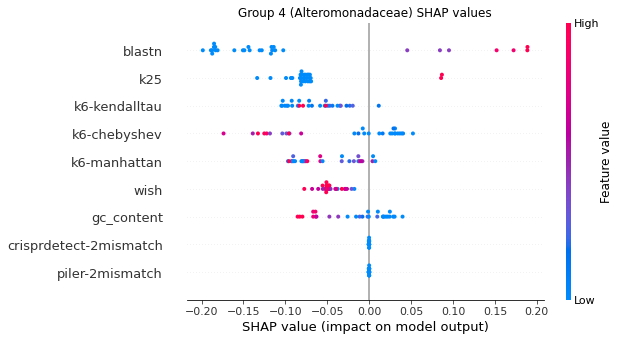

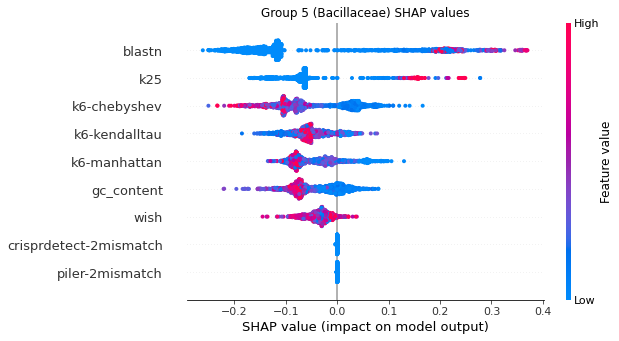

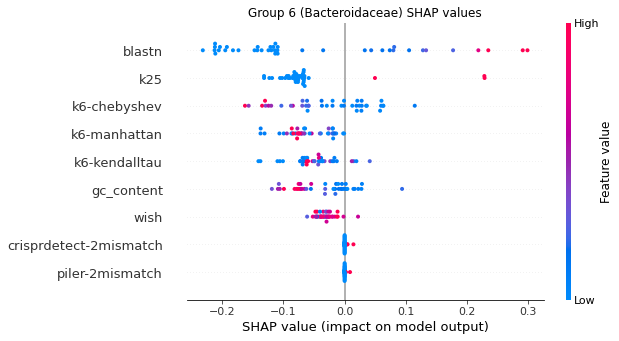

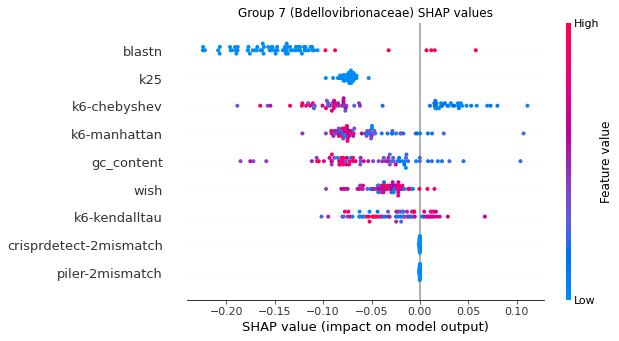

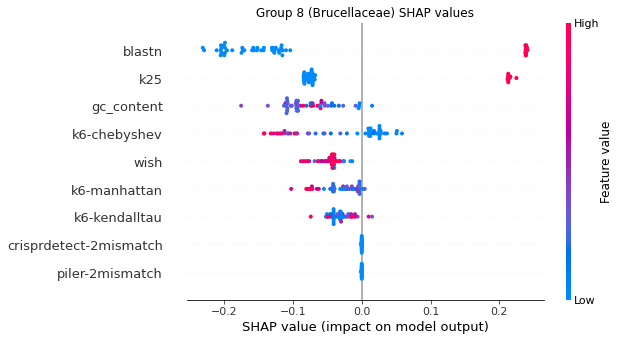

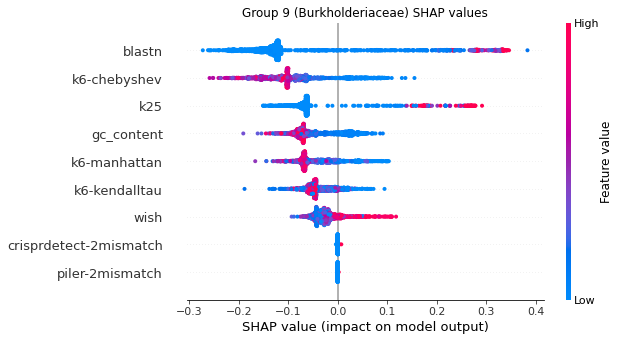

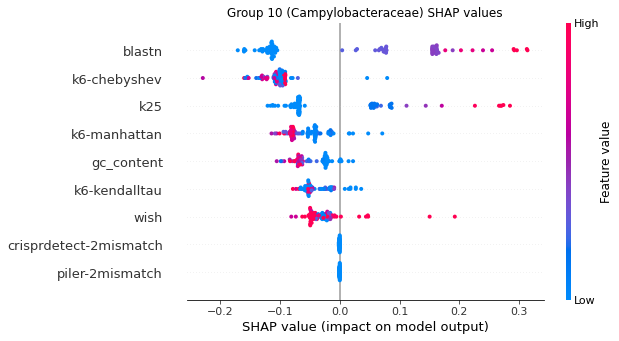

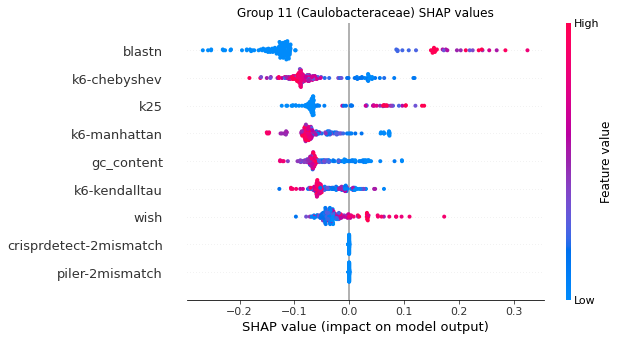

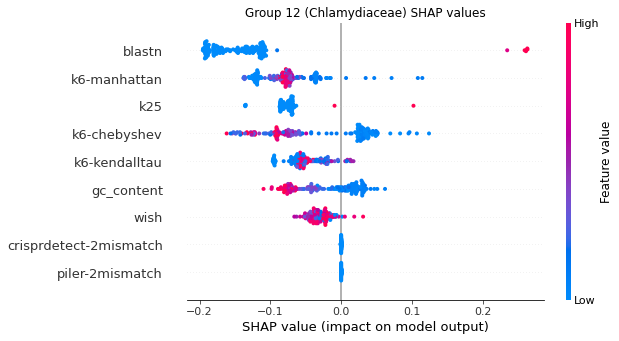

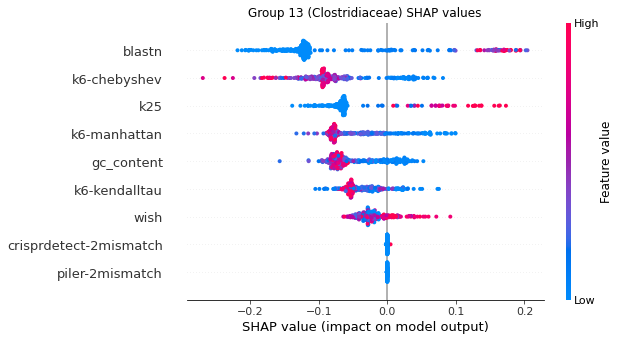

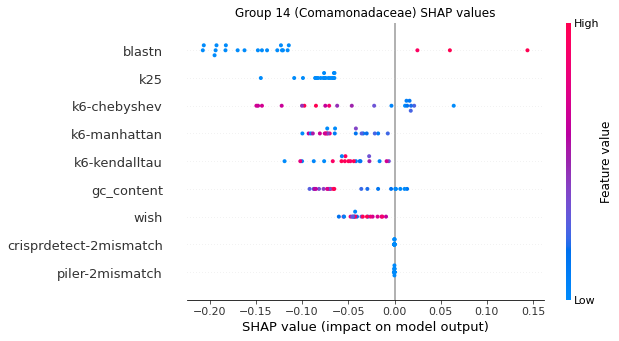

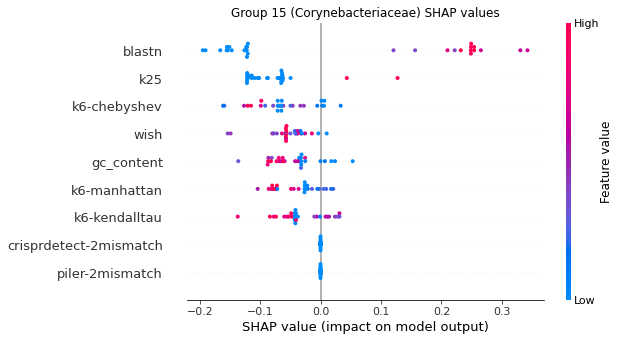

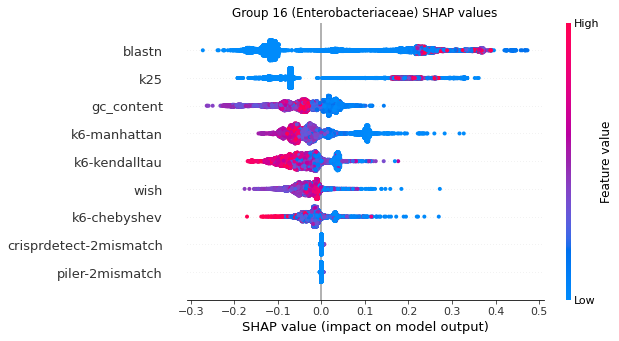

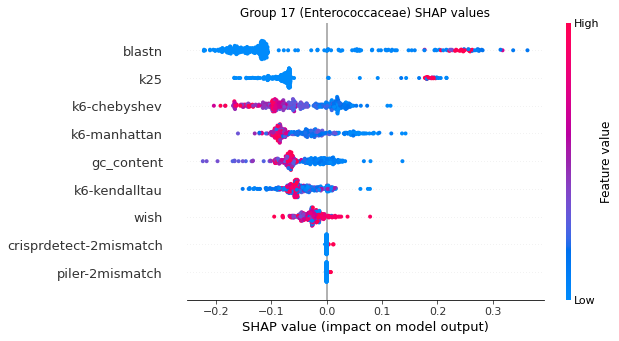

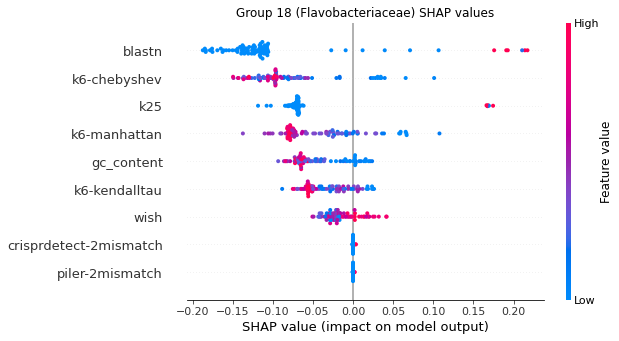

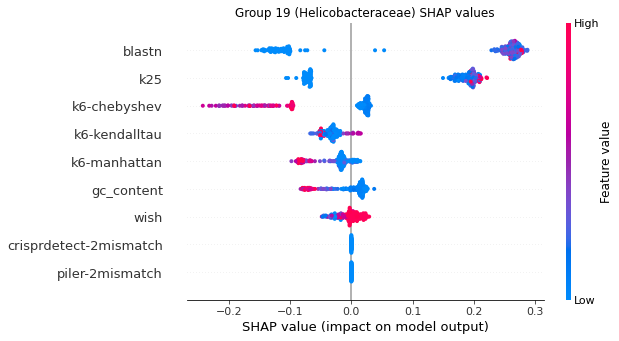

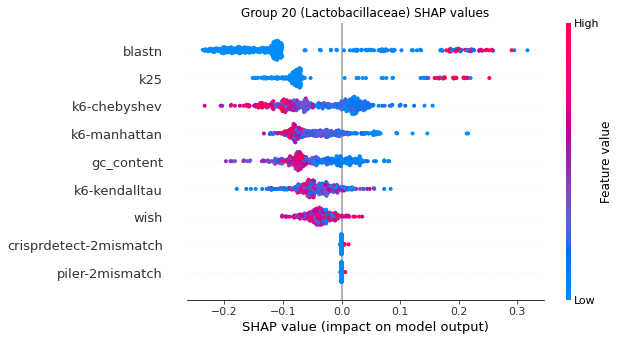

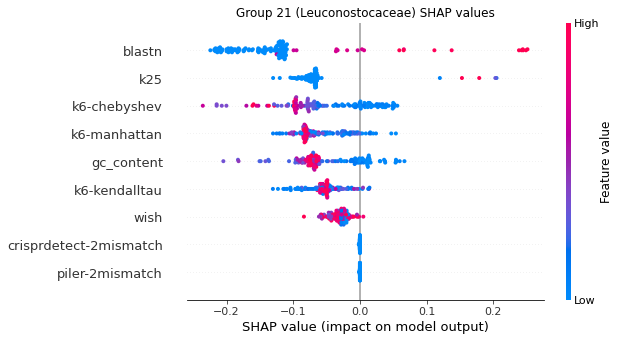

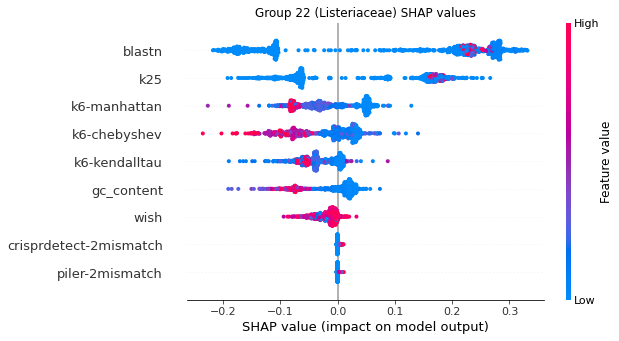

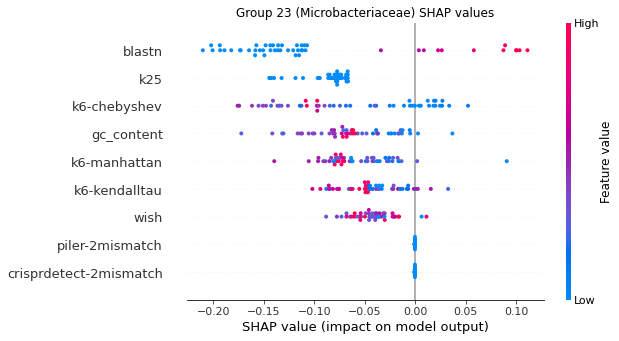

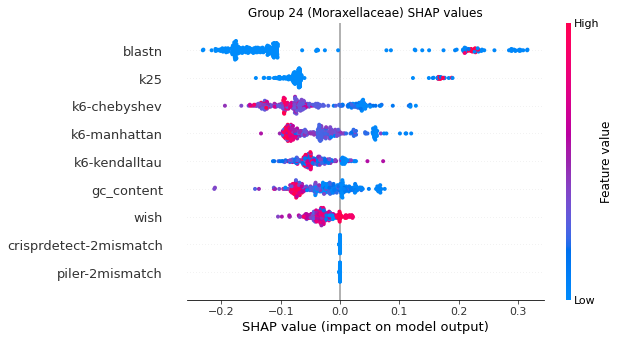

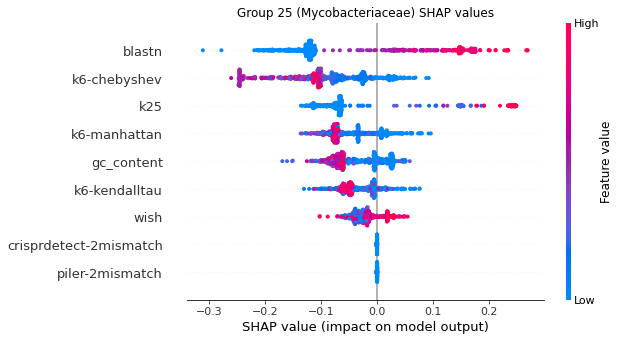

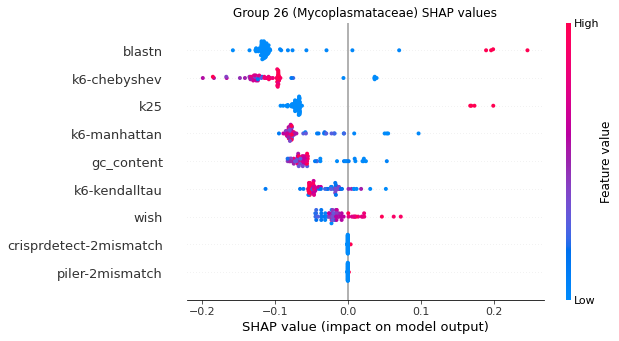

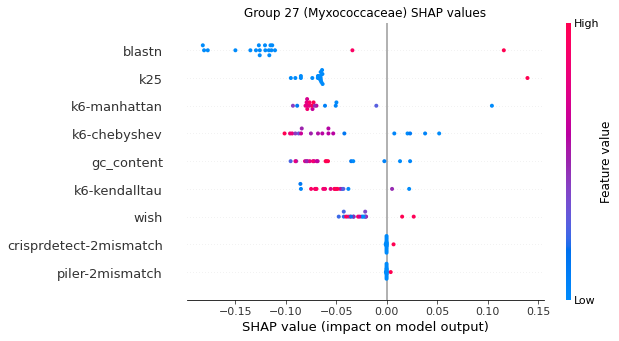

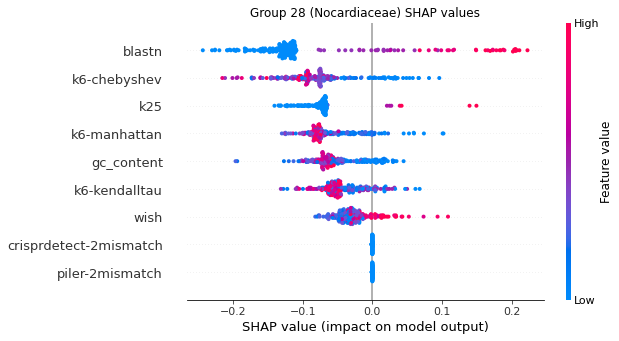

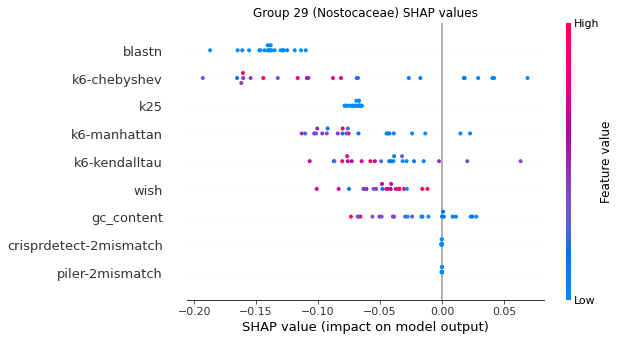

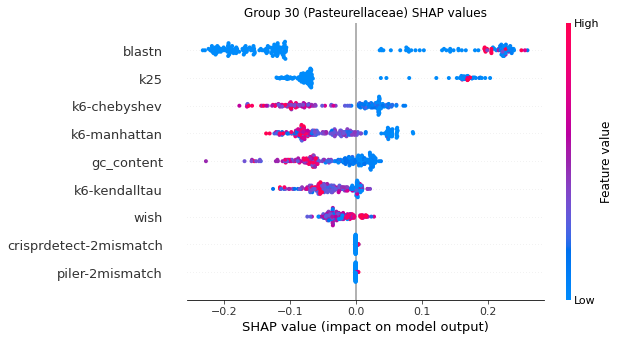

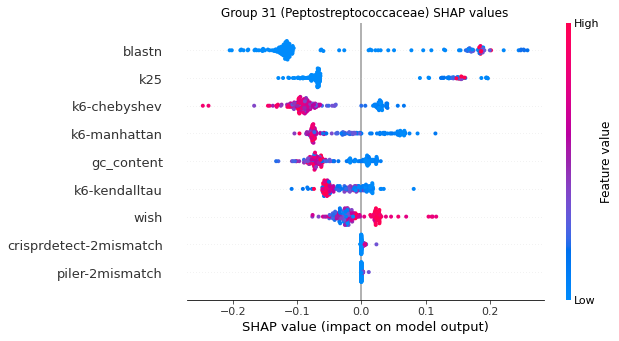

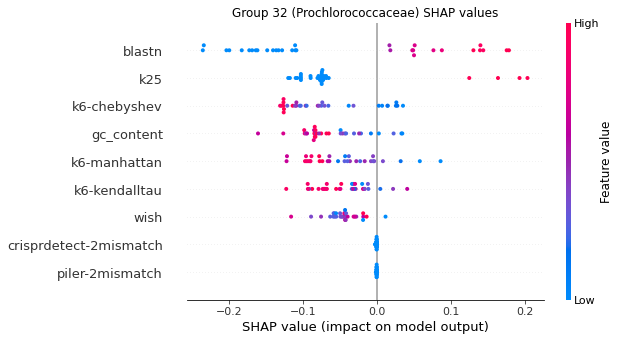

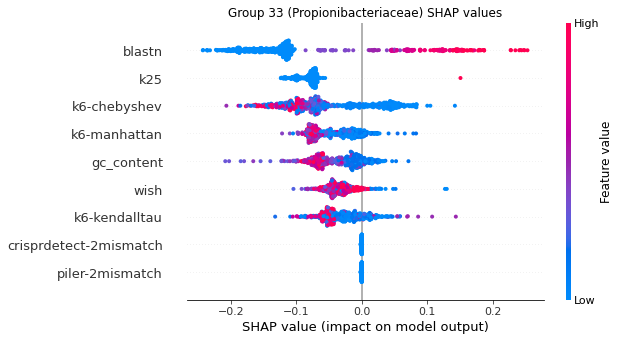

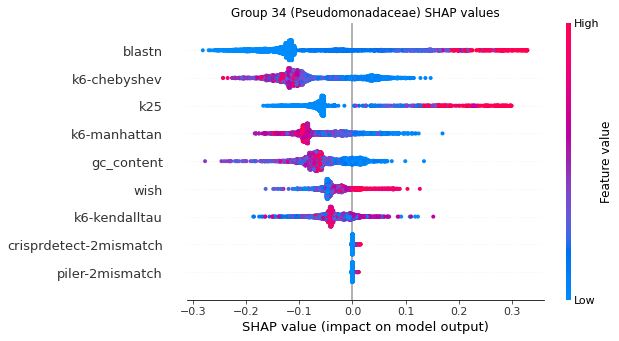

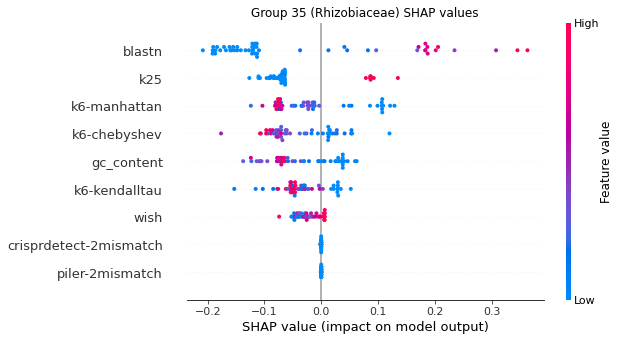

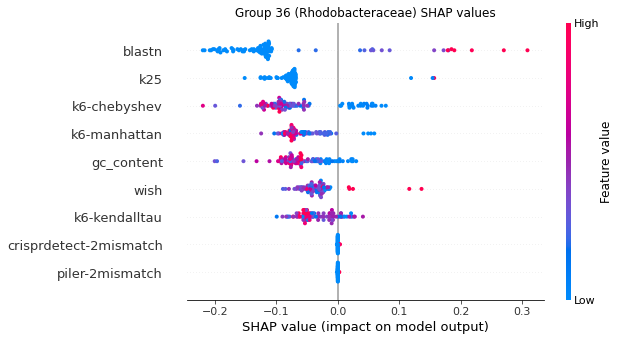

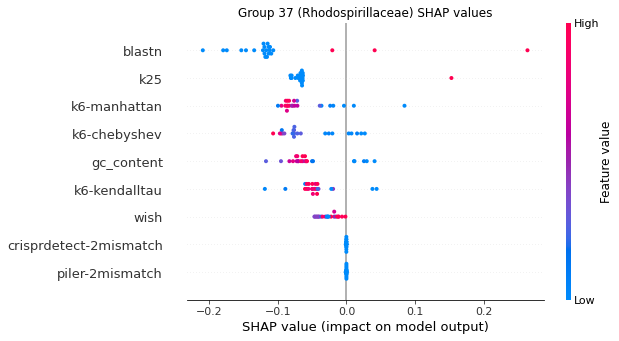

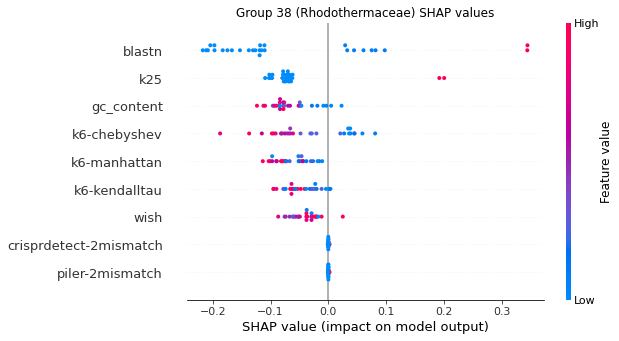

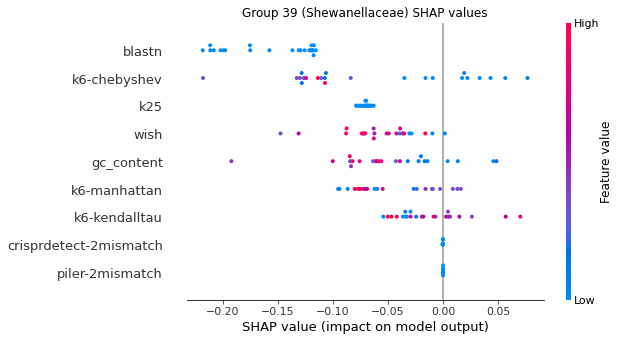

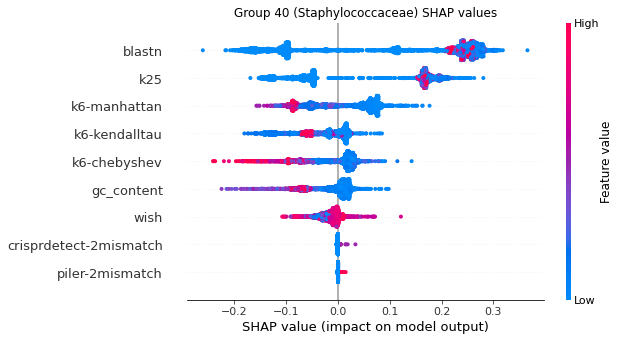

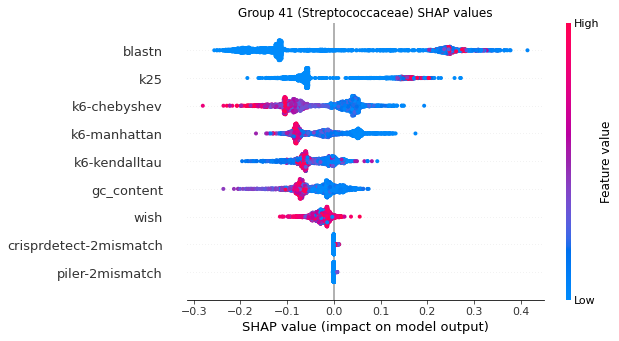

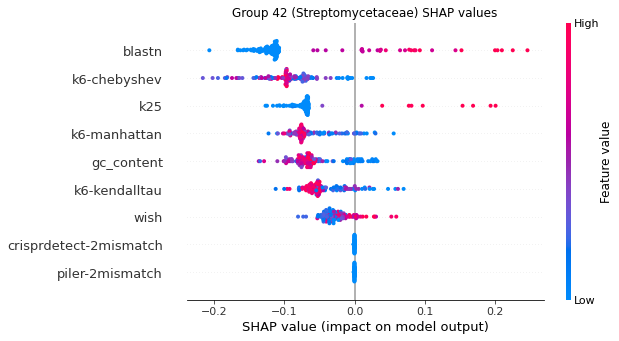

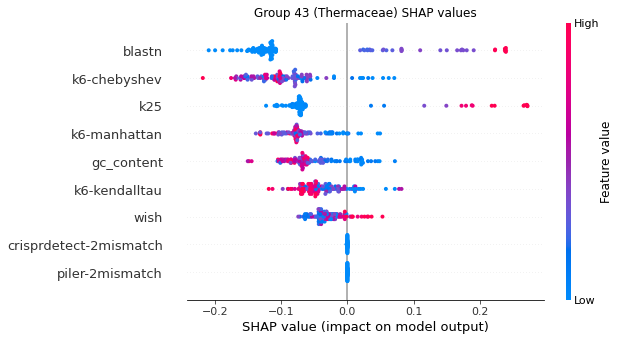

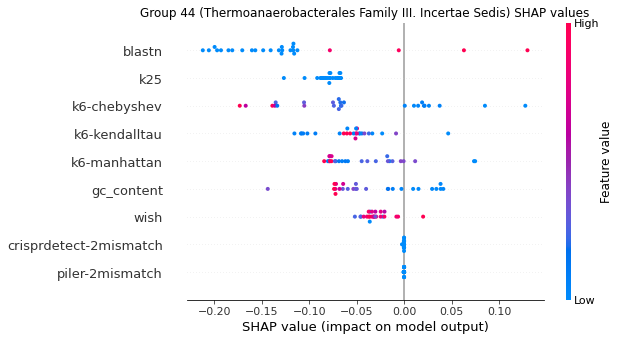

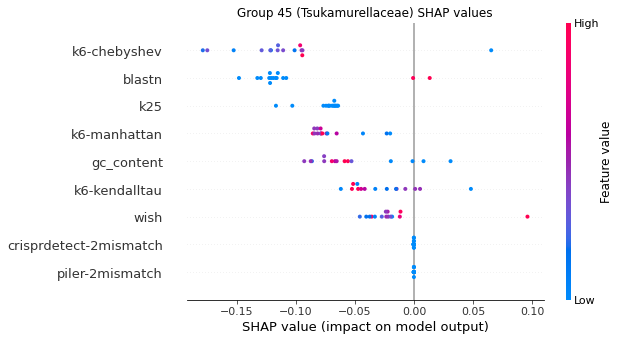

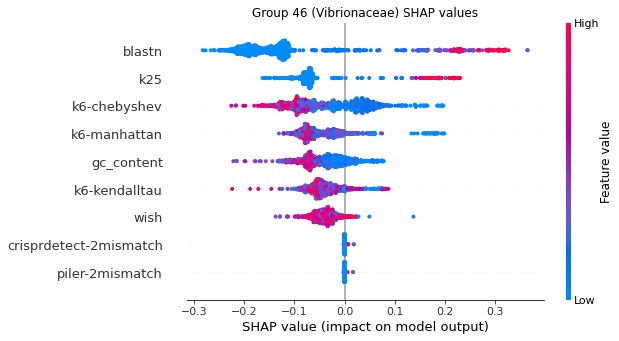

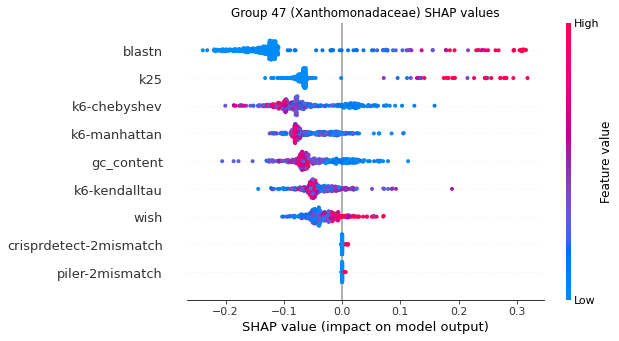

<Figure size 432x288 with 0 Axes>

In [38]:
plot_shap_values(shap_vals, X_learning)

In [61]:
def plot_mean_shap(X_learn: pd.DataFrame, shap_values):
    plt.bar(X_learn.columns, np.mean([np.mean(np.absolute(i), axis=0) for i in shap_values], axis=0))
    plt.xticks(rotation=90)
    plt.ylabel('Mean absolute SHAP value')
    plt.title('Random Forest - mean absolute SHAP values')

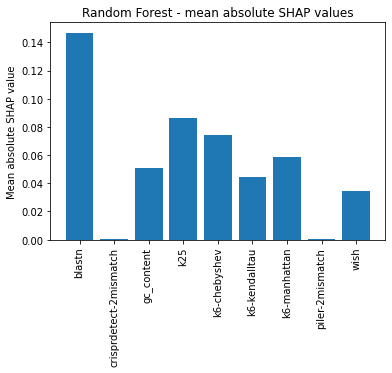

In [62]:
plot_mean_shap(X_learning, shap_vals)

# LinearSVC

#### Get SHAP values

In [3]:
from joblib import load
results_svc = load('test/dfs&results/results_linsvc.joblib')

In [4]:
# df_small = pd.read_csv('test/dfs&results/df_all_small.tsv', sep='\t')
learning_df = pd.read_csv('test/dfs&results/learning_df.tsv', sep='\t')

In [5]:
X_learning = learning_df.drop(['virus', 'host','group', 'group_code', 'y'],axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

In [6]:
def get_shap_values(estimators: list, X_learn: pd.DataFrame):
    vals = []
    for i, est in enumerate(estimators):
        X_test = X_learn[learning_df['group_code'] == i].values
        explainer = shap.Explainer(est.predict, X_learn[learning_df['group_code'] != i].values)
        vals.append(explainer(X_test))
    vals = np.array(vals)
    return vals

In [7]:
shap_vals = get_shap_values(results_svc['estimator'], X_learning)

Exact explainer: 1534it [00:12, 26.08it/s]                           
Exact explainer: 12632it [01:49, 104.13it/s]                           
Exact explainer: 2995it [00:26, 71.34it/s]                           
Exact explainer: 4874it [00:42, 87.18it/s]                           
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


#### Plot SHAP values

In [8]:
def plot_shap_values(shap_values: list, X_learn: pd.DataFrame, classifier_name: str):
    for i, vals in enumerate(shap_values):
        shap.summary_plot(vals, X_learn[learning_df['group_code'] == i], show=False)
        plt.title(f'Group {i} ({learning_df[learning_df["group_code"] == i].iloc[0]["group"]}) SHAP values')
        plt.savefig(f'test/shap_plots/{classifier_name}/group_{i}.png')
        # plt.show()
        plt.clf()
    return

In [17]:
def plot_mean_shap(X_learn: pd.DataFrame, shap_values: list, name: str):
    plt.bar(X_learn.columns, np.mean([np.absolute(val) for i in shap_values for val in i.values], axis=0))
    plt.gca().set_yscale('log') # note the log scale
    plt.xticks(rotation=90)
    plt.ylabel('Mean absolute SHAP value')
    plt.title(f'{name} - mean absolute SHAP values')

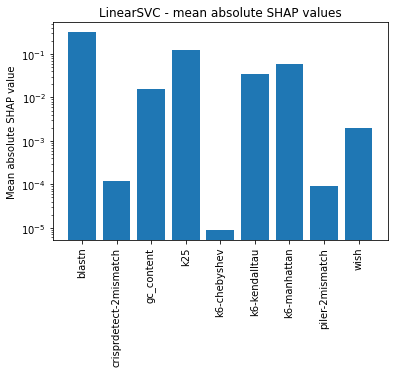

In [18]:
plot_mean_shap(X_learning, shap_vals, 'LinearSVC')

In [22]:
from joblib import dump
dump(shap_vals, 'test/shap_values_linsvc.joblib')

['test/shap_values_linsvc.joblib']

# Logistic Regression

### Create the model

In [3]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

learning_df = pd.read_csv('test/dfs&results/learning_df.tsv', sep='\t')
X_learning = learning_df.drop(['virus', 'host','group', 'group_code', 'y'],axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

logo = LeaveOneGroupOut()
lrc = LogisticRegression(penalty='l2', C=0.001, solver='liblinear')

results_lrc = cross_validate(lrc, X_learning, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

#### Get data for probas 

In [4]:
df_all = pd.read_csv('test/dfs&results/df_all_small.tsv', sep='\t')

In [5]:
X_all = df_all.drop(['virus', 'host','group', 'group_code', 'y', '0', '1'], axis=1)
y_all = df_all['y']
groups_main = df_all['group_code'].to_numpy()

#### Get probas

In [6]:
prob_df_sel = pd.DataFrame(index=range(len(df_all['y'])), columns=['0', '1'])
prob_df_sel['0'] = prob_df_sel['0'].astype('float')
prob_df_sel['1'] = prob_df_sel['1'].astype('float')
for i in range(0, max(groups_main)+1):
    mask_main = groups_main == i
    prob_df_sel.loc[mask_main, ['0', '1']] = \
        results_lrc['estimator'][i].predict_proba(X_all.loc[mask_main,:])

df_all['0'] = prob_df_sel['0']
df_all['1'] = prob_df_sel['1']
df_all.to_csv('test/dfs&results/df_all_lrc.tsv', sep='\t')

#### Save the model

In [9]:
from joblib import dump
dump(results_lrc, 'test/dfs&results/results_lrc.joblib')

['test/dfs&results/results_lrc.joblib']

### Calculate SHAP values

In [12]:
def get_shap_values_lrc(estimators: list, X_learn: pd.DataFrame):
    vals = []
    for i, est in enumerate(estimators):
        X_test = X_learn[learning_df['group_code'] == i]
        explainer = shap.Explainer(est, X_test)
        vals.append(explainer(X_test))
    vals = np.array(vals)
    return vals

In [13]:
shap_vals_lrc = get_shap_values_lrc(results_lrc['estimator'], X_learning)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


#### Plot the values

In [16]:
def plot_shap_values(shap_values: list, X_learn: pd.DataFrame, classifier_name: str):
    for i, vals in enumerate(shap_values):
        shap.summary_plot(vals, X_learn[learning_df['group_code'] == i], show=False)
        plt.title(f'Group {i} ({learning_df[learning_df["group_code"] == i].iloc[0]["group"]}) SHAP values')
        plt.savefig(f'test/shap_plots/{classifier_name}/group_{i}.png')
        # plt.show()
        plt.clf()
    return

In [17]:
plot_shap_values(shap_vals_lrc, X_learning, 'LRC')

<Figure size 576x367.2 with 0 Axes>

#### Plot mean values

In [58]:
def plot_mean_shap(X_learn: pd.DataFrame, shap_values: list, name: str):
    plt.bar(X_learn.columns, np.mean([np.absolute(val) for i in shap_values for val in i.values], axis=0))
    plt.gca().set_yscale('log') # note the log scale
    plt.xticks(rotation=90)
    plt.ylabel('Mean absolute SHAP value')
    plt.title(f'{name} - mean absolute SHAP values')

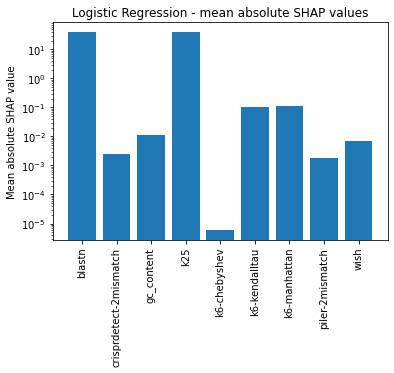

In [59]:
plot_mean_shap(X_learning, shap_vals_lrc, 'Logistic Regression')

#### Save the LRC SHAP values

In [55]:
from joblib import dump
dump(shap_vals_lrc, 'test/shap_values_lrc.joblib')

['test/shap_values_lrc.joblib']